# Number Recognition

### Import required libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np 

### Reading the MNIST dataset

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

### 28 X 28 pixel 

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

0 represents black area and the numbers represent the white area or the pixel where the number is written.

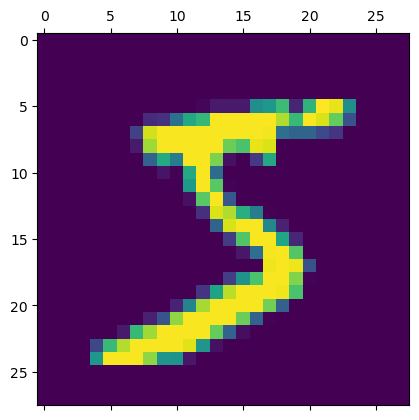

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train=X_train/255
X_test=X_test/255

 Division is done to get the values in range 0-1.
 This will increase the accuracy as the scaled model would give better accuracy.

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train.shape

(60000, 28, 28)

6000 is the no. of images and next two dimension i.e 28x28 pixel of an image.

In [12]:
X_train_flat=X_train.reshape(len(X_train),28*28)
X_train_flat.shape

(60000, 784)

In [13]:
X_test_flat=X_test.reshape(len(X_test),28*28)
X_test_flat.shape

(10000, 784)

### Creating the Neural Network

In [14]:
model=keras.Sequential([keras.layers.Dense
            (10,input_shape=(784,),activation='sigmoid')])

#10 is used for the 10 digits
# the above line is used for creating a neural network model
# keras.layers.Dense(10, ...)  adds a dense (fully connected) layer to the model with 10 output neurons
#input_shape=(784,) Specifies the shape of the input data expected 

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flat,y_train,epochs=5)
#epochs 5 represent the no. of times the model will go through the entire training dataset

Epoch 1/5
1875/1875 [==============================] - 23s 5ms/step - loss: 0.4737 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3043 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2838 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2670 - accuracy: 0.9255


### Evaluating accuracy on the Test Dataset

In [15]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 13s 4ms/step - loss: 0.2683 - accuracy: 0.9254


[0.2683011293411255, 0.9254000186920166]

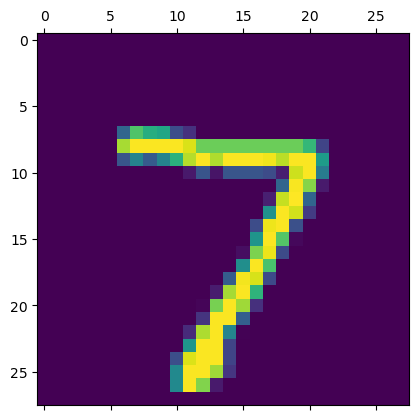

In [16]:
plt.matshow(X_test[0])

In [17]:
y_pred=model.predict(X_test_flat)

313/313 [==============================] - 11s 4ms/step


In [18]:
y_pred[0]

array([1.3380115e-02, 1.6850761e-07, 3.4898814e-02, 9.5966727e-01,
       1.7393079e-03, 6.6772811e-02, 8.4315474e-07, 9.9969625e-01,
       8.8008173e-02, 6.2747276e-01], dtype=float32)

In [19]:
np.argmax(y_pred[0])

7

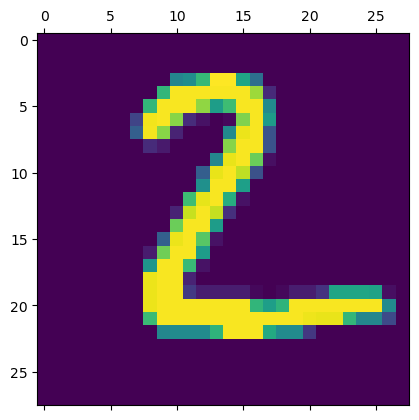

In [20]:
plt.matshow(X_test[1])

In [21]:
np.argmax(y_pred[1])

2

In [22]:
y_pred_label=[np.argmax(i) for i in y_pred]
y_pred_label[:5]

[7, 2, 1, 0, 4]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
c_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
print(c_matrix)

tf.Tensor(
[[ 961    0    2    2    0    4    6    2    2    1]
 [   0 1109    3    2    0    1    4    2   14    0]
 [   4    8  924   19    8    4   13   10   38    4]
 [   2    0   14  937    1   16    2    9   20    9]
 [   1    1    2    1  913    0   12    5   10   37]
 [  10    1    3   50   11  747   17    9   38    6]
 [   9    3    5    1    7   10  917    2    4    0]
 [   1    5   22   10    6    0    0  949    2   33]
 [   4    5    7   28    9   19    9   12  875    6]
 [  11    5    1   12   25    4    0   22    7  922]], shape=(10, 10), dtype=int32)


Text(70.72222222222221, 0.5, 'Truth')

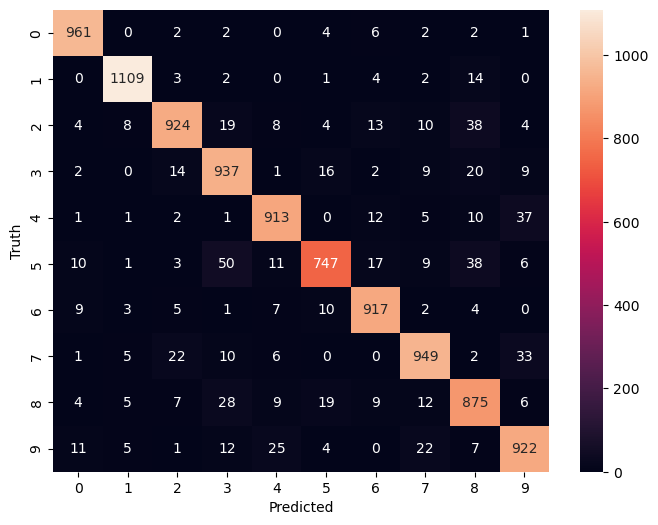

In [25]:
import seaborn as sn
plt.figure(figsize=(8,6))
sn.heatmap(c_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Adding hidden layer to increase the accuracy

In [26]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), 
    keras.layers.Dense(10,activation='sigmoid')]) 
#hidden layer
# first layer
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 27s 7ms/step - loss: 0.2714 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1193 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0838 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0647 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0507 - accuracy: 0.9843


In [27]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 12s 5ms/step - loss: 0.0839 - accuracy: 0.9734


[0.08394553512334824, 0.9733999967575073]

Text(70.72222222222221, 0.5, 'Truth')

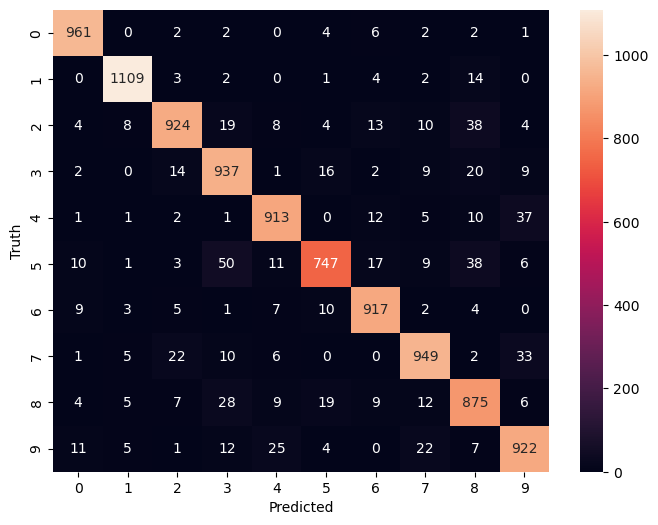

In [28]:
import seaborn as sn
plt.figure(figsize=(8,6))
sn.heatmap(c_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

By scaling the X_train, we can get more accurate results.